In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
train=pd.read_csv('/content/drive/My Drive/Data/AML assignment/fashion-mnist_train.csv')
test=pd.read_csv("/content/drive/My Drive/Data/AML assignment/fashion-mnist_test.csv")

In [35]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [36]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

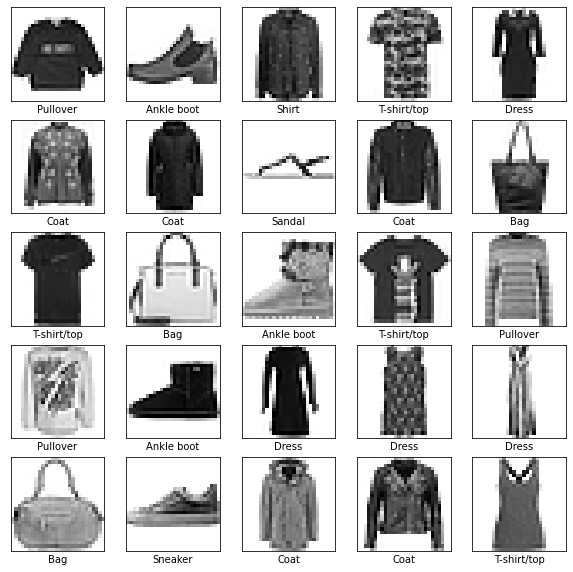

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
train_labels=train['label'].values
train_images=train.drop("label",1).values

In [0]:
test_labels=test['label'].values
test_images=test.drop("label",1).values

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [43]:
import tensorflow as tf 
tf.test.gpu_device_name() 


'/device:GPU:0'

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,LeakyReLU, Dropout,BatchNormalization

Using TensorFlow backend.


## Model 1

In [0]:
model=Sequential()
# Convloutional layers
model.add(Conv2D(30, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(50, 
                 kernel_size=(5, 5), 
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ANN
model.add(Flatten())
model.add(Dense(units=100))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(units=100))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels,batch_size=100,
                  epochs=50,validation_data=(test_images,test_labels), shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 76us/step - loss: 1.6710 - accuracy: 0.7927 - val_loss: 1.6132 - val_accuracy: 0.8476
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 1.5924 - accuracy: 0.8701 - val_loss: 1.5788 - val_accuracy: 0.8823
Epoch 3/50
60000/60000 [==============================] - 4s 71us/step - loss: 1.5737 - accuracy: 0.8879 - val_loss: 1.5712 - val_accuracy: 0.8903
Epoch 4/50
60000/60000 [==============================] - 4s 72us/step - loss: 1.5660 - accuracy: 0.8957 - val_loss: 1.5610 - val_accuracy: 0.9001
Epoch 5/50
60000/60000 [==============================] - 4s 72us/step - loss: 1.5601 - accuracy: 0.9007 - val_loss: 1.5694 - val_accuracy: 0.8923
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 1.5537 - accuracy: 0.9075 - val_loss: 1.5612 - val_accuracy: 0.8993
Epoch 7/50
60000/60000 [==============================] - 4s 72us/st

In [0]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 50)        37550     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 2450)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 100)               245100    
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 100)             

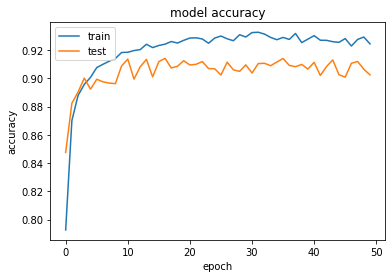

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/model1.png")

plt.show()

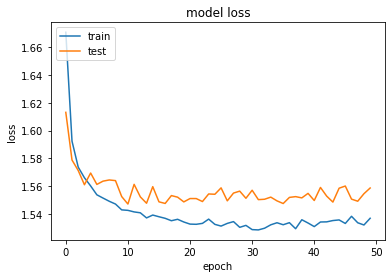

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/model1_loss.png")
plt.show()

## Model 2

In [0]:
model=Sequential()
# Convolutional layers
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(5, 5), 
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# ANN
model.add(Flatten())
model.add(Dense(units=100))
model.add(LeakyReLU(alpha=0.25))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels,batch_size=100,
                  epochs=50,validation_data=(test_images,test_labels), shuffle=True)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 75us/step - loss: 1.7027 - accuracy: 0.7598 - val_loss: 1.6570 - val_accuracy: 0.8059
Epoch 2/50
60000/60000 [==============================] - 4s 69us/step - loss: 1.6458 - accuracy: 0.8161 - val_loss: 1.6446 - val_accuracy: 0.8163
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 1.6110 - accuracy: 0.8507 - val_loss: 1.5689 - val_accuracy: 0.8933
Epoch 4/50
60000/60000 [==============================] - 4s 69us/step - loss: 1.5662 - accuracy: 0.8956 - val_loss: 1.5665 - val_accuracy: 0.8942
Epoch 5/50
60000/60000 [==============================] - 4s 69us/step - loss: 1.5561 - accuracy: 0.9056 - val_loss: 1.5799 - val_accuracy: 0.8808
Epoch 6/50
60000/60000 [==============================] - 4s 70us/step - loss: 1.5496 - accuracy: 0.9118 - val_loss: 1.5572 - val_accuracy: 0.9043
Epoch 7/50
60000/60000 [==============================] - 4s 70us/st

In [0]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 100)               313700    
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 100)             

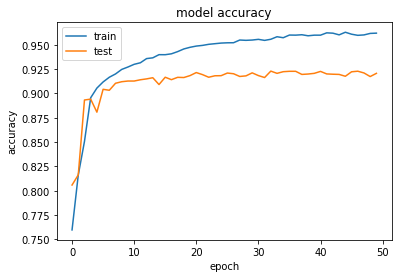

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/model2.png")
plt.show()

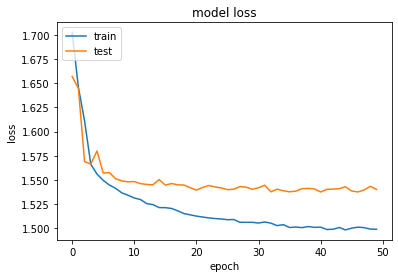

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/model2_loss.png")
plt.show()

## Model 3

In [0]:
model=Sequential()
# Convolutional layers
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(5, 5), 
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, 
                 kernel_size=(5, 5), 
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# ANN
model.add(Flatten())
model.add(Dense(units=100))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels,batch_size=100,
                  epochs=50,validation_data=(test_images,test_labels), shuffle=True)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 228us/step - loss: 1.7200 - accuracy: 0.7409 - val_loss: 1.6263 - val_accuracy: 0.8361
Epoch 2/50
60000/60000 [==============================] - 6s 107us/step - loss: 1.5921 - accuracy: 0.8691 - val_loss: 1.5913 - val_accuracy: 0.8702
Epoch 3/50
60000/60000 [==============================] - 6s 107us/step - loss: 1.5735 - accuracy: 0.8873 - val_loss: 1.5834 - val_accuracy: 0.8775
Epoch 4/50
60000/60000 [==============================] - 6s 107us/step - loss: 1.5643 - accuracy: 0.8964 - val_loss: 1.5697 - val_accuracy: 0.8914
Epoch 5/50
60000/60000 [==============================] - 6s 108us/step - loss: 1.5573 - accuracy: 0.9038 - val_loss: 1.5622 - val_accuracy: 0.8994
Epoch 6/50
60000/60000 [==============================] - 6s 108us/step - loss: 1.5542 - accuracy: 0.9066 - val_loss: 1.5745 - val_accuracy: 0.8861
Epoch 7/50
60000/60000 [==============================] - 6s 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 100)         160100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 100)        

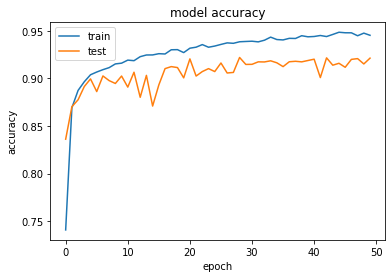

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/model3.png")
plt.show()

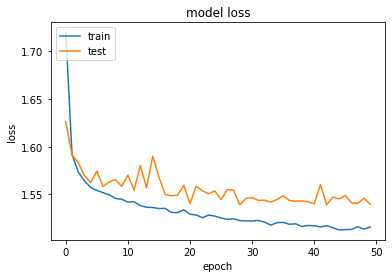

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/model3_loss.png")
plt.show()